<a href="https://colab.research.google.com/github/norayehia/cifar_data_computervision/blob/main/cifar_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [ ]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
#فولدر اخزن فيه 
PROJECT_ROOT_DIR = "."
#جوا الفولدر ده 
NB_ID = "sevens"

# create the directory if it does not exist
os.makedirs(os.path.join(PROJECT_ROOT_DIR, "images", NB_ID), exist_ok = True)
        
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", NB_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import skimage
from skimage.io import imread
from skimage.color import rgb2gray 
import skimage
from skimage import transform
from skimage import filters
import cv2
from matplotlib import pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray 
import skimage
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import skimage
from skimage.io import imread
from skimage.color import rgb2gray 
import skimage


from skimage import filters

In [ ]:
datadir='C://Users//win//Downloads//cifar-10//train//train'

In [ ]:
trainingdata3 = []
def create_training_data():
    
        
       
        for img in os.listdir(datadir):
            
            img_arry = rgb2gray(imread(os.path.join(datadir,img)))
            img2 = filters.sobel( img_arry)
            img2.max()
            #new_arry = skimage.transform.resize(img_arry, (45,45))
            new_arry = skimage.transform.resize(img2, (200,200))
            trainingdata3.append(new_arry)
create_training_data()

In [ ]:
print(trainingdata3[0])

[[0.11719053 0.11915494 0.12111935 ... 0.11387789 0.11435669 0.11483549]
 [0.12066668 0.12215695 0.12364721 ... 0.10964395 0.11057123 0.11149852]
 [0.12414284 0.12515896 0.12617508 ... 0.10541    0.10678578 0.10816155]
 ...
 [0.03519944 0.03969374 0.04418805 ... 0.15395982 0.17785241 0.20174499]
 [0.04104354 0.04541015 0.04977676 ... 0.16255117 0.1861854  0.20981963]
 [0.04688764 0.05112656 0.05536547 ... 0.17114253 0.1945184  0.21789427]]


In [ ]:
print(len(trainingdata3))

50000


In [ ]:
import numpy as np
import pandas as pd
trainingdata3=np.array(trainingdata3)

#yy=np.array(yy)
#b_flatten = b.reshape(b.shape[0], -1).To get rid of ValueError: Found array with dim 3. Estimator expected <= 2. with the classfier it need 1d

trainingdata3= trainingdata3.reshape(trainingdata3.shape[0], -1)

In [ ]:
columns_to_be_removed = ['id']
sourceFileName="C:/Users/win/Downloads/cifar-10/trainLabels.csv"
label = pd.read_csv(sourceFileName).drop(columns_to_be_removed, axis = 'columns')

In [ ]:
from sklearn.model_selection import train_test_split
bb_train, bb_test, yy_train, yy_test = train_test_split(trainingdata3, label, test_size=0.15, random_state=42)

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=30, tol=0.1, solver='liblinear')
# sgd_clf = SGDClassifier(max_iter=5, random_state=42)
clf.fit(bb_train, yy_train)

In [ ]:
yy_pred=clf.predict(bb_test)
yy_pred

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(yy_test, yy_pred)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy ', 100* accuracy_score(yy_test, yy_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(yy_test, yy_pred)
print('Confusion matrix: \n{0}'.format(conf_mx))

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4', 'class 5', 'class 6','class 7','class 8', 'class 9']
print(classification_report(yy_test, yy_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.06      0.02      0.03       721
     class 1       0.09      0.40      0.15       734
     class 2       0.00      0.00      0.00       769
     class 3       0.00      0.00      0.00       768
     class 4       0.09      0.30      0.14       704
     class 5       0.11      0.01      0.02       763
     class 6       0.09      0.03      0.04       749
     class 7       0.09      0.08      0.08       755
     class 8       0.10      0.05      0.07       771
     class 9       0.09      0.06      0.07       766

    accuracy                           0.09      7500
   macro avg       0.07      0.09      0.06      7500
weighted avg       0.07      0.09      0.06      7500



E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Iteration 0, loss = 2.321522655303878
Iteration 1, loss = 2.310052098352539
Iteration 2, loss = 2.3075821236759855
Iteration 3, loss = 2.305809096101654
Iteration 4, loss = 2.304398656236039


Text(0, 0.5, '1-accuracy')

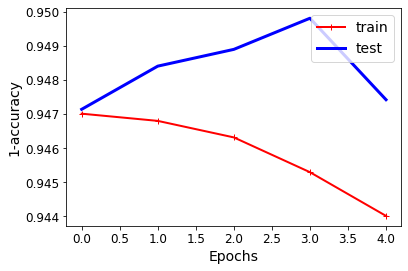

In [ ]:
import warnings
from sklearn.neural_network import MLPClassifier
nEpochs = 5

nn_clf = MLPClassifier(max_iter=1,warm_start='true',solver='sgd')

train_errors, test_errors = [], []

for epoch in range(nEpochs): 
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        nn_clf.fit(bb_train, yy_train)
    print(f'Iteration {epoch}, loss = {nn_clf.loss_}')
    train_errors.append(1-accuracy_score(yy_train, nn_clf.predict(bb_train)))
    test_errors.append(1-accuracy_score(yy_test, nn_clf.predict(bb_test)))
    
plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="test")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("1-accuracy", fontsize=14) 

In [ ]:
print(f'Number of layers {nn_clf.n_layers_}')
for lyr in range(nn_clf.n_layers_-1):
    print('Layer {0}: Weights {1} Bias {2}'.format(lyr,nn_clf.coefs_[lyr].shape, nn_clf.intercepts_[lyr].shape))

Number of layers 3
Layer 0: Weights (2025, 100) Bias (100,)
Layer 1: Weights (100, 10) Bias (10,)


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = nn_clf.predict(bb_train)
y_pred_test = nn_clf.predict(bb_test)
print('Classifier accuracy on the training set is {0} '.format(accuracy_score(yy_train, y_pred)))
print('Classifier accuracy on the test set is {0} '.format(accuracy_score(yy_test, y_pred_test)))

Classifier accuracy on the training set is 0.10884705882352941 
Classifier accuracy on the test set is 0.1024 


In [ ]:
def copyfile(filename, target_dir):
    """Copy a file into a target directory."""
    os.makedirs(target_dir, exist_ok=True)
    shutil.copy(filename, target_dir)

In [ ]:
def reorg_train_valid(data_dir, labels, valid_ratio):
    """Split the validation set out of the original training set."""
    # The number of examples of the class that has the fewest examples in the
    # training dataset
    n = collections.Counter(labels.values()).most_common()[-1][1]
    # The number of examples per class for the validation set
    n_valid_per_label = max(1, math.floor(n * valid_ratio))
    label_count = {}
    for train_file in os.listdir(os.path.join(data_dir, 'train')):
        label = labels[train_file.split('.')[0]]
        fname = os.path.join(data_dir, 'train', train_file)
        copyfile(
            fname,
            os.path.join(data_dir, 'train_valid_test', 'train_valid', label))
        if label not in label_count or label_count[label] < n_valid_per_label:
            copyfile(
                fname,
                os.path.join(data_dir, 'train_valid_test', 'valid', label))
            label_count[label] = label_count.get(label, 0) + 1
        else:
            copyfile(
                fname,
                os.path.join(data_dir, 'train_valid_test', 'train', label))
    return n_valid_per_label

In [ ]:
def reorg_test(data_dir):
    """Organize the testing set for data loading during prediction."""
    for test_file in os.listdir(os.path.join(data_dir, 'test')):
        copyfile(
            os.path.join(data_dir, 'test', test_file),
            os.path.join(data_dir, 'train_valid_test', 'test', 'unknown'))

In [ ]:
def reorg_cifar10_data(data_dir, valid_ratio):
    labels = read_csv_labels(os.path.join(data_dir, 'trainLabels.csv'))
    reorg_train_valid(data_dir, labels, valid_ratio)
    reorg_test(data_dir)